<a href="https://colab.research.google.com/github/st3vejobs/602-Assignment-08/blob/main/DATA_602_Assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 08

### Baseball Statistics Exploration

I will be using statistics from the 2021 MLB season to complete this assignment. 
I chose this dataset because baseball is an essential part of my life and data analytics are central to the success of baseball.


Source: [Rotowire](https://www.rotowire.com/baseball/stats.php?season=2021)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

### Loading the Data and Cleaning the Dataframe

I will attempt to merge any entries where a player played for more than one team. This process was very involved but it was a worthwhile exercise. 

In [34]:
mlbraw = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/st3vejobs/602-Assignment-08/main/mlb-player-stats-Batters.csv'))


#print(mlbraw.head())
mlb = pd.DataFrame(mlbraw.sort_values(['Player']))
mlb.set_axis(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS'], axis = 'columns')
mlb = pd.DataFrame(mlb.dropna())
#print(mlb.head())
index_list = list(range(len(mlb)))
mlb['idx_sort'] = index_list
mlb = mlb.set_index('idx_sort')

for idx in range(len(mlb)):
  if mlb.loc[idx, 'Pos'] == "1B":
    mlb.loc[idx, 'Pos'] = "IF"
  elif mlb.loc[idx, 'Pos'] == "2B":
    mlb.loc[idx, 'Pos'] = "IF"
  elif mlb.loc[idx, 'Pos'] == "3B":
    mlb.loc[idx, 'Pos'] = "IF"
  elif mlb.loc[idx, 'Pos'] == "SS":
    mlb.loc[idx, 'Pos'] = "IF"

dup = pd.DataFrame((mlb[mlb.duplicated(['Player'], keep=False)]))
#print(dup)
dupidx = list(range(len(dup)))
dup['newdex'] = dupidx
dup = dup.set_index('newdex')
#print(dup)
names = list(set(dup.loc[: , 'Player']))
#print(names)
dup_meta = pd.DataFrame(columns = ['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS'])
dup_meta['Player'] = names
dup_meta['Team'] = 'Multiple'

for name in range(len(dup_meta)):
  for i in range(len(mlb)):
    if dup_meta.loc[name, 'Player'] == mlb.loc[i, 'Player']:
      dup_meta.loc[name, 'Pos'] = mlb.loc[i,'Pos']
for name in range(len(dup_meta)):
  for i in range(len(mlb)):
    if dup_meta.loc[name, 'Player'] == mlb.loc[i, 'Player']:
      dup_meta.loc[name, 'Age'] = mlb.loc[i,'Age']

for name in range(len(dup_meta)):
  for i in range(len(dup)):
    if dup_meta.loc[name, 'Player'] == dup.loc[i, 'Player']:
      if i <= len(dup) - 4 and dup_meta.loc[name, 'Player'] == dup.loc[i+1, 'Player'] and dup_meta.loc[name, 'Player'] == dup.loc[i+2, 'Player'] and dup_meta.loc[name, 'Player'] == dup.loc[i+3, 'Player']:
        dup_meta.loc[name, 'G'] = dup.loc[i, 'G'] + dup.loc[i + 1, 'G'] + dup.loc[i + 2, 'G'] + dup.loc[i + 3, 'G']
        dup_meta.loc[name, 'AB'] = dup.loc[i, 'AB'] + dup.loc[i + 1, 'AB'] + dup.loc[i + 2, 'AB'] + dup.loc[i + 3, 'AB']
        dup_meta.loc[name, 'R'] = dup.loc[i, 'R'] + dup.loc[i + 1, 'R'] + dup.loc[i + 2, 'R'] + dup.loc[i + 3, 'R']
        dup_meta.loc[name, 'H'] = dup.loc[i, 'H'] + dup.loc[i + 1, 'H'] + dup.loc[i + 2, 'H'] + dup.loc[i + 3, 'H']
        dup_meta.loc[name, '2B'] = dup.loc[i, '2B'] + dup.loc[i + 1, '2B'] + dup.loc[i + 2, '2B'] + dup.loc[i + 3, '2B']
        dup_meta.loc[name, '3B'] = dup.loc[i, '3B'] + dup.loc[i + 1, '3B'] + dup.loc[i + 2, '3B'] + dup.loc[i + 3, '3B']
        dup_meta.loc[name, 'HR'] = dup.loc[i, 'HR'] + dup.loc[i + 1, 'HR'] + dup.loc[i + 2, 'HR'] + dup.loc[i + 3, 'HR']
        dup_meta.loc[name, 'RBI'] = dup.loc[i, 'RBI'] + dup.loc[i + 1, 'RBI'] + dup.loc[i + 2, 'RBI'] + dup.loc[i + 3, 'RBI']
        dup_meta.loc[name, 'SB'] = dup.loc[i, 'SB'] + dup.loc[i + 1, 'SB'] + dup.loc[i + 2, 'SB'] + dup.loc[i + 3, 'SB']
        dup_meta.loc[name, 'CS'] = dup.loc[i, 'CS'] + dup.loc[i + 1, 'CS'] + dup.loc[i + 2, 'CS'] + dup.loc[i + 3, 'CS']
        dup_meta.loc[name, 'BB'] = dup.loc[i, 'BB'] + dup.loc[i + 1, 'BB'] + dup.loc[i + 2, 'BB'] + dup.loc[i + 3, 'BB']
        dup_meta.loc[name, 'SO'] = dup.loc[i, 'SO'] + dup.loc[i + 1, 'SO'] + dup.loc[i + 2, 'SO'] + dup.loc[i + 3, 'SO']
        dup_meta.loc[name, 'SH'] = dup.loc[i, 'SH'] + dup.loc[i + 1, 'SH'] + dup.loc[i + 2, 'SH'] + dup.loc[i + 3, 'SH']
        dup_meta.loc[name, 'SF'] = dup.loc[i, 'SF'] + dup.loc[i + 1, 'SF'] + dup.loc[i + 2, 'SF'] + dup.loc[i + 3, 'SF']
        dup_meta.loc[name, 'HBP'] = dup.loc[i, 'HBP'] + dup.loc[i + 1, 'HBP'] + dup.loc[i + 2, 'HBP'] + dup.loc[i + 3, 'HBP']
      elif i <= len(dup) - 3 and dup_meta.loc[name, 'Player'] == dup.loc[i+1, 'Player'] and dup_meta.loc[name, 'Player'] == dup.loc[i+2, 'Player']:
        dup_meta.loc[name, 'G'] = dup.loc[i, 'G'] + dup.loc[i + 1, 'G'] + dup.loc[i + 2, 'G']
        dup_meta.loc[name, 'AB'] = dup.loc[i, 'AB'] + dup.loc[i + 1, 'AB'] + dup.loc[i + 2, 'AB']
        dup_meta.loc[name, 'R'] = dup.loc[i, 'R'] + dup.loc[i + 1, 'R'] + dup.loc[i + 2, 'R']
        dup_meta.loc[name, 'H'] = dup.loc[i, 'H'] + dup.loc[i + 1, 'H'] + dup.loc[i + 2, 'H']
        dup_meta.loc[name, '2B'] = dup.loc[i, '2B'] + dup.loc[i + 1, '2B'] + dup.loc[i + 2, '2B']
        dup_meta.loc[name, '3B'] = dup.loc[i, '3B'] + dup.loc[i + 1, '3B'] + dup.loc[i + 2, '3B']
        dup_meta.loc[name, 'HR'] = dup.loc[i, 'HR'] + dup.loc[i + 1, 'HR'] + dup.loc[i + 2, 'HR']
        dup_meta.loc[name, 'RBI'] = dup.loc[i, 'RBI'] + dup.loc[i + 1, 'RBI'] + dup.loc[i + 2, 'RBI']
        dup_meta.loc[name, 'SB'] = dup.loc[i, 'SB'] + dup.loc[i + 1, 'SB'] + dup.loc[i + 2, 'SB']
        dup_meta.loc[name, 'CS'] = dup.loc[i, 'CS'] + dup.loc[i + 1, 'CS'] + dup.loc[i + 2, 'CS']
        dup_meta.loc[name, 'BB'] = dup.loc[i, 'BB'] + dup.loc[i + 1, 'BB'] + dup.loc[i + 2, 'BB']
        dup_meta.loc[name, 'SO'] = dup.loc[i, 'SO'] + dup.loc[i + 1, 'SO'] + dup.loc[i + 2, 'SO']
        dup_meta.loc[name, 'SH'] = dup.loc[i, 'SH'] + dup.loc[i + 1, 'SH'] + dup.loc[i + 2, 'SH']
        dup_meta.loc[name, 'SF'] = dup.loc[i, 'SF'] + dup.loc[i + 1, 'SF'] + dup.loc[i + 2, 'SF']
        dup_meta.loc[name, 'HBP'] = dup.loc[i, 'HBP'] + dup.loc[i + 1, 'HBP'] + dup.loc[i + 2, 'HBP']
      elif i <= len(dup) - 2 and dup_meta.loc[name, 'Player'] == dup.loc[i+1, 'Player']:
        dup_meta.loc[name, 'G'] = dup.loc[i, 'G'] + dup.loc[i + 1, 'G']
        dup_meta.loc[name, 'AB'] = dup.loc[i, 'AB'] + dup.loc[i + 1, 'AB']
        dup_meta.loc[name, 'R'] = dup.loc[i, 'R'] + dup.loc[i + 1, 'R']
        dup_meta.loc[name, 'H'] = dup.loc[i, 'H'] + dup.loc[i + 1, 'H']
        dup_meta.loc[name, '2B'] = dup.loc[i, '2B'] + dup.loc[i + 1, '2B']
        dup_meta.loc[name, '3B'] = dup.loc[i, '3B'] + dup.loc[i + 1, '3B']
        dup_meta.loc[name, 'HR'] = dup.loc[i, 'HR'] + dup.loc[i + 1, 'HR']
        dup_meta.loc[name, 'RBI'] = dup.loc[i, 'RBI'] + dup.loc[i + 1, 'RBI']
        dup_meta.loc[name, 'SB'] = dup.loc[i, 'SB'] + dup.loc[i + 1, 'SB']
        dup_meta.loc[name, 'CS'] = dup.loc[i, 'CS'] + dup.loc[i + 1, 'CS']
        dup_meta.loc[name, 'BB'] = dup.loc[i, 'BB'] + dup.loc[i + 1, 'BB']
        dup_meta.loc[name, 'SO'] = dup.loc[i, 'SO'] + dup.loc[i + 1, 'SO']
        dup_meta.loc[name, 'SH'] = dup.loc[i, 'SH'] + dup.loc[i + 1, 'SH']
        dup_meta.loc[name, 'SF'] = dup.loc[i, 'SF'] + dup.loc[i + 1, 'SF']
        dup_meta.loc[name, 'HBP'] = dup.loc[i, 'HBP'] + dup.loc[i + 1, 'HBP']

for idx in range(len(dup_meta)):
  dup_meta.loc[idx, 'AVG'] = dup_meta.loc[idx, 'H']/dup_meta.loc[idx, 'AB']
  dup_meta.loc[idx, 'OBP'] = (dup_meta.loc[idx, 'H'] + dup_meta.loc[idx, 'BB'] + dup_meta.loc[idx, 'HBP'])/dup_meta.loc[idx, 'AB']
  dup_meta.loc[idx, 'SLG'] = ((dup_meta.loc[idx, 'H'] - dup_meta.loc[idx, '2B'] - dup_meta.loc[idx, '3B'] - dup_meta.loc[idx, 'HR']) + 2*dup_meta.loc[idx, '2B'] + 3*dup_meta.loc[idx, '3B'] + 4*dup_meta.loc[idx, 'HR'])/dup_meta.loc[idx, 'AB']
  dup_meta.loc[idx, 'OPS'] = dup_meta.loc[idx, 'OBP'] + dup_meta.loc[idx, 'SLG']
dup_meta = pd.DataFrame(dup_meta)
#print(dup_meta.head())
#print(mlb.head())
idxlist = []
for idx in range(len(mlb)):
  for name in names:
    if mlb.loc[idx, 'Player'] == name:
      idxlist.append(str(idx))
#print(idxlist)
for i in range(0, len(idxlist)):
  idxlist[i] = int(idxlist[i])
#print(idxlist)
mlb = pd.DataFrame(mlb.drop(idxlist))

mlbfull = pd.DataFrame(pd.concat([mlb, dup_meta]))
print(mlbfull.dtypes)
tonum = ['Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS']
mlbfull[tonum] = mlbfull[tonum].apply(pd.to_numeric, errors='coerce')
#print(mlbfull.dtypes)
mlbfull['findex'] = range(len(mlbfull))
mlbfull = mlbfull.set_index('findex')
#mlbfull.index.duplicated()

Player    object
Team      object
Pos       object
Age       object
G         object
AB        object
R         object
H         object
2B        object
3B        object
HR        object
RBI       object
SB        object
CS        object
BB        object
SO        object
SH        object
SF        object
HBP       object
AVG       object
OBP       object
SLG       object
OPS       object
dtype: object


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### Summary Statistics

There are many statistics available, but I will print just the summary statistics for age and batting average. I will print the mean for each category. 

In [35]:
#print(mlbfull.iloc[:, 2:23].groupby("Pos").describe())
print(mlbfull.iloc[:, [2, 3, 19]].groupby("Pos").describe())
print(mlbfull.iloc[:, 2:22].groupby("Pos").mean())

       Age                                                        AVG  \
     count       mean       std   min    25%   50%   75%   max  count   
Pos                                                                     
C    114.0  29.543860  3.951342  23.0  27.00  29.0  32.0  39.0  114.0   
DH     8.0  31.375000  5.578978  25.0  26.75  31.0  34.5  41.0    8.0   
IF   292.0  28.688356  3.600611  21.0  26.00  28.0  31.0  42.0  292.0   
OF   245.0  28.400000  3.228206  22.0  26.00  28.0  30.0  38.0  245.0   

                                                                   
         mean       std    min       25%     50%       75%    max  
Pos                                                                
C    0.213472  0.080131  0.000  0.183000  0.2220  0.250000  0.500  
DH   0.237124  0.035400  0.167  0.221721  0.2520  0.259027  0.271  
IF   0.227381  0.064887  0.000  0.204000  0.2445  0.267000  0.333  
OF   0.222081  0.085514  0.000  0.194444  0.2330  0.259000  1.000  
           A

## Data Visualization

### Part 1

In this pyplot boxplot I modified the median line, I added a title, and I changed the color of the outliers. This is a boxplot of the batting averages found in the entire dataset.

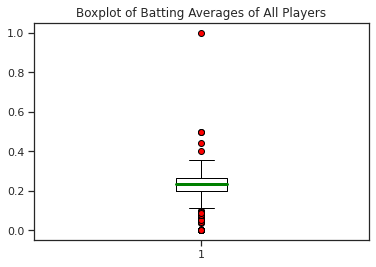

In [67]:
dh = mlbfull[mlbfull["Pos"] == "DH"]
inf = mlbfull[mlbfull["Pos"] == "IF"]
of = mlbfull[mlbfull["Pos"] == "OF"]
c = mlbfull[mlbfull["Pos"] == "C"]

plt.boxplot(data = mlbfull, x = "AVG", medianprops = dict(color = "green", linewidth = "3"), flierprops = dict(markerfacecolor = "red"))
plt.title("Boxplot of Batting Averages of All Players")
plt.show()

### Histograms

In the first histogram, I added custom bins, I changed the color, and I changed the data to show density instead of count.

In the second histogram, I stacked the values from each position group. 

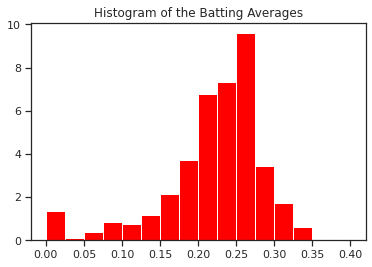

In [99]:
plt.hist(data = mlbfull, x = "AVG", bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4], color = "red",density = True)
plt.title("Histogram of the Batting Averages")
plt.show()



### Stacked Histogram

In this histogram, I stacked each position's contribution to the overall distribution to better represent the weight of each position. 

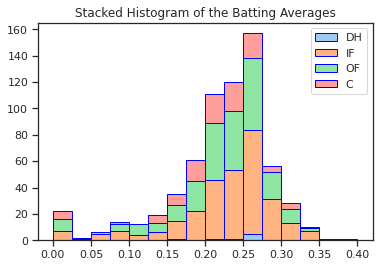

In [98]:
b, bins, patches = plt.hist(
    [mlbfull.loc[mlbfull['Pos'] == 'DH', 'AVG'],
     mlbfull.loc[mlbfull['Pos'] == 'IF', 'AVG'],
     mlbfull.loc[mlbfull['Pos'] == 'OF', 'AVG'],
     mlbfull.loc[mlbfull['Pos'] == 'C', 'AVG']],
    stacked=True, bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4],
    label=['DH','IF', 'OF', 'C'],
    edgecolor='blue')
plt.legend()
plt.title("Stacked Histogram of the Batting Averages")
plt.show()

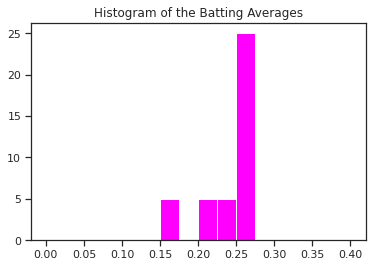

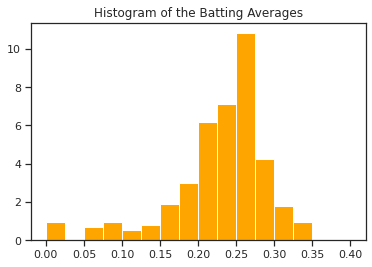

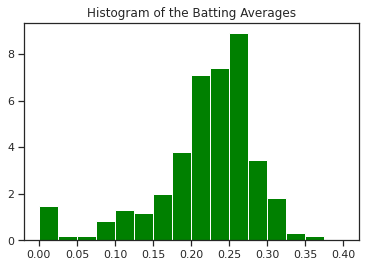

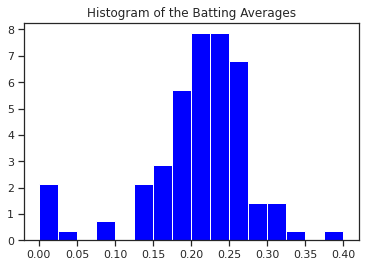

In [84]:
plt.hist(data = dh, x = "AVG", bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4], color = "magenta",density = True)
plt.title("Histogram of the Batting Averages")
plt.show()
plt.hist(data = inf, x = "AVG", bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4], color = "orange",density = True)
plt.title("Histogram of the Batting Averages")
plt.show()
plt.hist(data = of, x = "AVG", bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4], color = "green",density = True)
plt.title("Histogram of the Batting Averages")
plt.show()
plt.hist(data = c, x = "AVG", bins= [0,0.025, 0.05,0.075,0.10,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4], color = "blue",density = True)
plt.title("Histogram of the Batting Averages")
plt.show()

#### Part 2

Boxplot:

Below is a Seaborn boxplot showing the distribution of batting averages for each position group. In general, infielders and designated hitters have the highest batting averages. 

I added titles, I used a custom color palette, and I sorted the data by position.

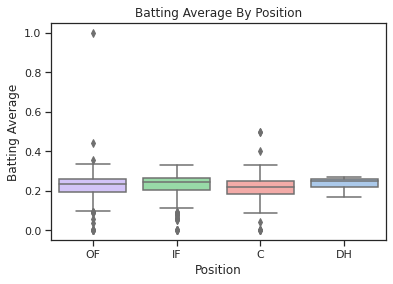

In [36]:
sb.set_theme(style="ticks", palette="pastel")


box = sb.boxplot(x="Pos", y="AVG",palette=["m", "g", "r", "b"],
            data=mlbfull).set(title = "Batting Average By Position", xlabel = "Position", ylabel = "Batting Average")
plt.show(box)

#### Histograms

Below are Seaborn histograms showing the distribution of batting averages for each position group. For the most part, outfielders and catchers have mostly normal distributions. Both designated hitters and infielders have left-skewed distributions. 

In these plots, I use axis and plot titles, I use a kernel density estimate, I used stat="density", and I modified the color of each plot. 

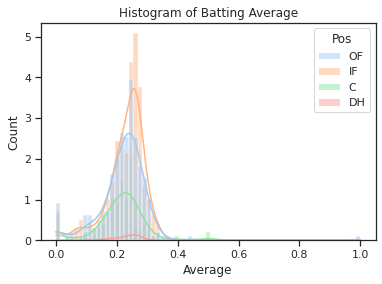

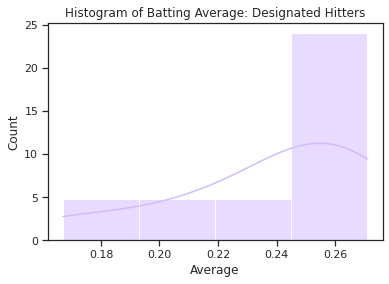

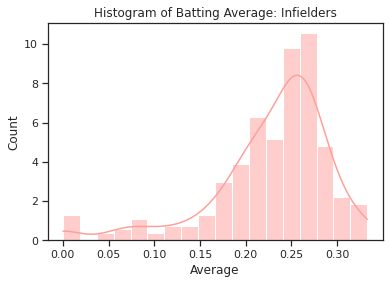

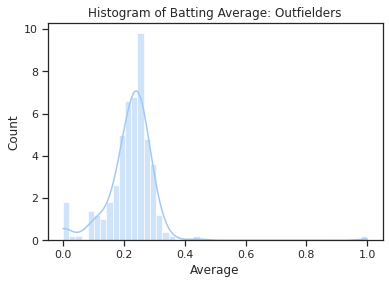

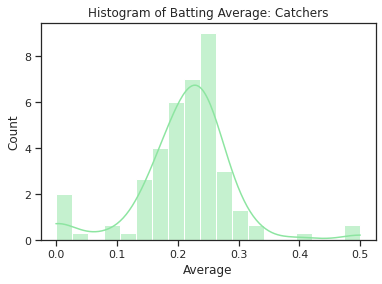

In [53]:
histfull = sb.histplot(data = mlbfull, x="AVG", hue = "Pos",stat = "density", kde = True).set(title = "Histogram of Batting Average", xlabel = "Average", ylabel = "Count")
plt.show(histfull)



histdh = sb.histplot(data = dh, x="AVG", color = "m",stat = "density", kde = True, palette = "m").set(title = "Histogram of Batting Average: Designated Hitters", xlabel = "Average", ylabel = "Count")
plt.show(histfull)

histif = sb.histplot(data = inf, x="AVG", color = "r",stat = "density", kde = True, palette = "m").set(title = "Histogram of Batting Average: Infielders", xlabel = "Average", ylabel = "Count")
plt.show(histfull)

histof = sb.histplot(data = of, x="AVG", color = "b",stat = "density", kde = True, palette = "m").set(title = "Histogram of Batting Average: Outfielders", xlabel = "Average", ylabel = "Count")
plt.show(histfull)

histc = sb.histplot(data = c, x="AVG", color = "g",stat = "density", kde = True, palette = "m").set(title = "Histogram of Batting Average: Catchers", xlabel = "Average", ylabel = "Count")
plt.show(histfull)

## Part 3

Overall, Seaborn was way easier to use than pyplot. I did not enjoy manually typing out the binwidth for each bin in the histogram. I prefer the binwidth parameter in ggplot, where you can just enter binwidth = 0.025, and you're good to go. I spent maybe twice as long on the Matplotlib portion than I spent on the Seaborn portion. Also, the boxplot in Matplotlib was not as easy to use as the boxplot in Seaborn. In fact, I was not able to figure out how to group the boxplot by position in the Matplotlib portion. 

## Conclusion

From the exploration of the dataset, I found that the IQR for designated hitters has the smallest range of outcomes of the four positions. The worst performing designated hitter is nearly twice as good as the worst performing player in each other position. I learned that infielders and outfielders add the most weight to the distribution of batting averages for all players. Overall, the distribution of batting averages for all players is nearly normal, but with a left-skew.